# Train BlazePalm Model

In [1]:
import os
import glob
import json

import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from utils import anchors_generator, encoder, loss_function
from nets import blaze_palm 
from utils.data_generator import DataGenerator

In [2]:
tf.__version__

'2.2.0'

## Create BlazePalm Model

In [3]:
model = blaze_palm.build_blaze_palm_model()

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
depthwise_conv2d (DepthwiseConv (None, 128, 128, 32) 320         activation[0][0]                 
______________________________________________________________________________________________

In [5]:
adam = tf.keras.optimizers.Adam()
ssd_loss = loss_function.SSDLoss(alpha=1./256.)
model.compile(optimizer='adam', loss=ssd_loss.compute_loss)

## Prepare Data

In [6]:
train_data_generator = DataGenerator(image_dir=os.path.join('dataset', 'image'), batch_size=32,
                                     annotation_dir=os.path.join('dataset', 'annotation'))
val_data_generator = DataGenerator(image_dir=os.path.join('dataset', 'image'), batch_size=32,
                                     annotation_dir=os.path.join('dataset', 'annotation'))

In [7]:
batch = train_data_generator.__getitem__(0)
ssd_loss.compute_loss(batch[1], model.predict(batch[0]))

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.21973401, 0.05460116, 0.0182077 , 0.01840758, 0.05855126,
       0.0520019 , 0.09148461, 0.04964001, 0.03336883, 0.08692008,
       0.1012383 , 0.05858969, 0.03385623, 0.07229984, 0.06122773,
       0.03515569, 0.06167225, 0.05587616, 0.03291347, 0.05295041,
       0.05259905, 0.05723399, 0.01139894, 0.04856443, 0.01333425,
       0.07836248, 0.09507768, 0.13135311, 0.05734739, 0.04321858,
       0.07530537, 0.04541277], dtype=float32)>

## Training

> `fit_generator` not work

In [8]:
history = model.fit(x=train_data_generator, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 366ms/step - loss: 0.0559
Epoch 2/1000
3/3 [==============================] - 1s 420ms/step - loss: 0.0516
Epoch 3/1000
3/3 [==============================] - 1s 388ms/step - loss: 0.0501
Epoch 4/1000
3/3 [==============================] - 1s 422ms/step - loss: 0.0521
Epoch 5/1000
3/3 [==============================] - 1s 398ms/step - loss: 0.0474
Epoch 6/1000
3/3 [==============================] - 1s 385ms/step - loss: 0.0458
Epoch 7/1000
3/3 [==============================] - 1s 378ms/step - loss: 0.0444
Epoch 8/1000
3/3 [==============================] - 1s 414ms/step - loss: 0.0442
Epoch 9/1000
3/3 [==============================] - 1s 384ms/step - loss: 0.0417
Epoch 10/1000
3/3 [==============================] - 1s 425ms/step - loss: 0.0424
Epoch 11/1000
3/3 [==============================] - 1s 365ms/step - loss: 0.0452
Epoch 12/1000
3/3 [==============================] - 1s 364ms/step - loss: 0.0419
Epoch 13/1000
3/3 [======

3/3 [==============================] - 1s 369ms/step - loss: 0.0206
Epoch 102/1000
3/3 [==============================] - 1s 397ms/step - loss: 0.0218
Epoch 103/1000
3/3 [==============================] - 1s 398ms/step - loss: 0.0210
Epoch 104/1000
3/3 [==============================] - 1s 399ms/step - loss: 0.0222
Epoch 105/1000
3/3 [==============================] - 1s 400ms/step - loss: 0.0212
Epoch 106/1000
3/3 [==============================] - 1s 397ms/step - loss: 0.0197
Epoch 107/1000
3/3 [==============================] - 1s 373ms/step - loss: 0.0209
Epoch 108/1000
3/3 [==============================] - 1s 399ms/step - loss: 0.0198
Epoch 109/1000
3/3 [==============================] - 1s 398ms/step - loss: 0.0207
Epoch 110/1000
3/3 [==============================] - 1s 399ms/step - loss: 0.0206
Epoch 111/1000
3/3 [==============================] - 1s 397ms/step - loss: 0.0211
Epoch 112/1000
3/3 [==============================] - 1s 399ms/step - loss: 0.0204
Epoch 113/1000
3/3 

3/3 [==============================] - 1s 421ms/step - loss: 0.0121
Epoch 200/1000
3/3 [==============================] - 1s 426ms/step - loss: 0.0119
Epoch 201/1000
3/3 [==============================] - 1s 431ms/step - loss: 0.0118
Epoch 202/1000
3/3 [==============================] - 1s 422ms/step - loss: 0.0119
Epoch 203/1000
3/3 [==============================] - 1s 377ms/step - loss: 0.0119
Epoch 204/1000
3/3 [==============================] - 1s 431ms/step - loss: 0.0104
Epoch 205/1000
3/3 [==============================] - 1s 401ms/step - loss: 0.0106
Epoch 206/1000
3/3 [==============================] - 1s 419ms/step - loss: 0.0107
Epoch 207/1000
3/3 [==============================] - 1s 428ms/step - loss: 0.0103
Epoch 208/1000
3/3 [==============================] - 1s 430ms/step - loss: 0.0105
Epoch 209/1000
3/3 [==============================] - 1s 425ms/step - loss: 0.0099
Epoch 210/1000
3/3 [==============================] - 1s 413ms/step - loss: 0.0098
Epoch 211/1000
3/3 

3/3 [==============================] - 1s 428ms/step - loss: 0.0024
Epoch 298/1000
3/3 [==============================] - 1s 408ms/step - loss: 0.0021
Epoch 299/1000
3/3 [==============================] - 1s 434ms/step - loss: 0.0021
Epoch 300/1000
3/3 [==============================] - 1s 414ms/step - loss: 0.0023
Epoch 301/1000
3/3 [==============================] - 1s 362ms/step - loss: 0.0021
Epoch 302/1000
3/3 [==============================] - 1s 427ms/step - loss: 0.0018
Epoch 303/1000
3/3 [==============================] - 1s 419ms/step - loss: 0.0020
Epoch 304/1000
3/3 [==============================] - 1s 428ms/step - loss: 0.0019
Epoch 305/1000
3/3 [==============================] - 1s 356ms/step - loss: 0.0019
Epoch 306/1000
3/3 [==============================] - 1s 417ms/step - loss: 0.0020
Epoch 307/1000
3/3 [==============================] - 1s 417ms/step - loss: 0.0018
Epoch 308/1000
3/3 [==============================] - 1s 424ms/step - loss: 0.0019
Epoch 309/1000
3/3 

3/3 [==============================] - 1s 375ms/step - loss: 0.0016
Epoch 396/1000
3/3 [==============================] - 1s 346ms/step - loss: 0.0014
Epoch 397/1000
3/3 [==============================] - 1s 373ms/step - loss: 0.0014
Epoch 398/1000
3/3 [==============================] - 1s 347ms/step - loss: 0.0012
Epoch 399/1000
3/3 [==============================] - 1s 348ms/step - loss: 0.0012
Epoch 400/1000
3/3 [==============================] - 1s 372ms/step - loss: 0.0014
Epoch 401/1000
3/3 [==============================] - 1s 374ms/step - loss: 0.0011
Epoch 402/1000
3/3 [==============================] - 1s 350ms/step - loss: 0.0011
Epoch 403/1000
3/3 [==============================] - 1s 400ms/step - loss: 8.5971e-04
Epoch 404/1000
3/3 [==============================] - 1s 369ms/step - loss: 8.4454e-04
Epoch 405/1000
3/3 [==============================] - 1s 398ms/step - loss: 9.5013e-04
Epoch 406/1000
3/3 [==============================] - 1s 399ms/step - loss: 8.2321e-04
Epo

3/3 [==============================] - 1s 372ms/step - loss: 6.4382e-04
Epoch 491/1000
3/3 [==============================] - 1s 344ms/step - loss: 5.3805e-04
Epoch 492/1000
3/3 [==============================] - 1s 399ms/step - loss: 5.3889e-04
Epoch 493/1000
3/3 [==============================] - 1s 400ms/step - loss: 6.2610e-04
Epoch 494/1000
3/3 [==============================] - 1s 399ms/step - loss: 5.5852e-04
Epoch 495/1000
3/3 [==============================] - 1s 370ms/step - loss: 7.3246e-04
Epoch 496/1000
3/3 [==============================] - 1s 379ms/step - loss: 8.7429e-04
Epoch 497/1000
3/3 [==============================] - 1s 397ms/step - loss: 7.4860e-04
Epoch 498/1000
3/3 [==============================] - 1s 399ms/step - loss: 7.4582e-04
Epoch 499/1000
3/3 [==============================] - 1s 400ms/step - loss: 6.9630e-04
Epoch 500/1000
3/3 [==============================] - 1s 399ms/step - loss: 8.3285e-04
Epoch 501/1000
3/3 [==============================] - 1s 3

3/3 [==============================] - 1s 388ms/step - loss: 3.8910e-04
Epoch 585/1000
3/3 [==============================] - 1s 390ms/step - loss: 3.5730e-04
Epoch 586/1000
3/3 [==============================] - 1s 416ms/step - loss: 3.4663e-04
Epoch 587/1000
3/3 [==============================] - 1s 419ms/step - loss: 4.9547e-04
Epoch 588/1000
3/3 [==============================] - 1s 412ms/step - loss: 3.9303e-04
Epoch 589/1000
3/3 [==============================] - 1s 417ms/step - loss: 5.3059e-04
Epoch 590/1000
3/3 [==============================] - 1s 396ms/step - loss: 4.2334e-04
Epoch 591/1000
3/3 [==============================] - 1s 408ms/step - loss: 5.0650e-04
Epoch 592/1000
3/3 [==============================] - 1s 413ms/step - loss: 5.3654e-04
Epoch 593/1000
3/3 [==============================] - 1s 383ms/step - loss: 4.1650e-04
Epoch 594/1000
3/3 [==============================] - 1s 427ms/step - loss: 6.0562e-04
Epoch 595/1000
3/3 [==============================] - 1s 4

3/3 [==============================] - 1s 427ms/step - loss: 5.1996e-04
Epoch 679/1000
3/3 [==============================] - 1s 420ms/step - loss: 6.2273e-04
Epoch 680/1000
3/3 [==============================] - 1s 428ms/step - loss: 7.0544e-04
Epoch 681/1000
3/3 [==============================] - 1s 419ms/step - loss: 5.4701e-04
Epoch 682/1000
3/3 [==============================] - 1s 402ms/step - loss: 7.8355e-04
Epoch 683/1000
3/3 [==============================] - 1s 418ms/step - loss: 5.6820e-04
Epoch 684/1000
3/3 [==============================] - 1s 421ms/step - loss: 5.1790e-04
Epoch 685/1000
3/3 [==============================] - 1s 358ms/step - loss: 6.1688e-04
Epoch 686/1000
3/3 [==============================] - 1s 423ms/step - loss: 4.0278e-04
Epoch 687/1000
3/3 [==============================] - 1s 378ms/step - loss: 4.2861e-04
Epoch 688/1000
3/3 [==============================] - 1s 356ms/step - loss: 4.4461e-04
Epoch 689/1000
3/3 [==============================] - 1s 3

3/3 [==============================] - 1s 399ms/step - loss: 5.0157e-04
Epoch 773/1000
3/3 [==============================] - 1s 400ms/step - loss: 4.3742e-04
Epoch 774/1000
3/3 [==============================] - 1s 399ms/step - loss: 5.1350e-04
Epoch 775/1000
3/3 [==============================] - 1s 398ms/step - loss: 5.5129e-04
Epoch 776/1000
3/3 [==============================] - 1s 401ms/step - loss: 3.7557e-04
Epoch 777/1000
3/3 [==============================] - 1s 355ms/step - loss: 4.5437e-04
Epoch 778/1000
3/3 [==============================] - 1s 398ms/step - loss: 4.6049e-04
Epoch 779/1000
3/3 [==============================] - 1s 397ms/step - loss: 3.5738e-04
Epoch 780/1000
3/3 [==============================] - 1s 399ms/step - loss: 4.2355e-04
Epoch 781/1000
3/3 [==============================] - 1s 399ms/step - loss: 4.0251e-04
Epoch 782/1000
3/3 [==============================] - 1s 400ms/step - loss: 4.6108e-04
Epoch 783/1000
3/3 [==============================] - 1s 4

3/3 [==============================] - 1s 396ms/step - loss: 5.9551e-04
Epoch 867/1000
3/3 [==============================] - 1s 397ms/step - loss: 5.9999e-04
Epoch 868/1000
3/3 [==============================] - 1s 372ms/step - loss: 6.5427e-04
Epoch 869/1000
3/3 [==============================] - 1s 398ms/step - loss: 6.3848e-04
Epoch 870/1000
3/3 [==============================] - 1s 372ms/step - loss: 5.7479e-04
Epoch 871/1000
3/3 [==============================] - 1s 399ms/step - loss: 5.5409e-04
Epoch 872/1000
3/3 [==============================] - 1s 399ms/step - loss: 4.4068e-04
Epoch 873/1000
3/3 [==============================] - 1s 398ms/step - loss: 4.9330e-04
Epoch 874/1000
3/3 [==============================] - 1s 400ms/step - loss: 3.4095e-04
Epoch 875/1000
3/3 [==============================] - 1s 398ms/step - loss: 3.2396e-04
Epoch 876/1000
3/3 [==============================] - 1s 398ms/step - loss: 2.8341e-04
Epoch 877/1000
3/3 [==============================] - 1s 3

3/3 [==============================] - 1s 400ms/step - loss: 3.4866e-04
Epoch 961/1000
3/3 [==============================] - 1s 396ms/step - loss: 2.6825e-04
Epoch 962/1000
3/3 [==============================] - 1s 406ms/step - loss: 4.1606e-04
Epoch 963/1000
3/3 [==============================] - 1s 433ms/step - loss: 3.0434e-04
Epoch 964/1000
3/3 [==============================] - 1s 430ms/step - loss: 2.4565e-04
Epoch 965/1000
3/3 [==============================] - 1s 382ms/step - loss: 2.5706e-04
Epoch 966/1000
3/3 [==============================] - 1s 428ms/step - loss: 2.3616e-04
Epoch 967/1000
3/3 [==============================] - 1s 420ms/step - loss: 2.7621e-04
Epoch 968/1000
3/3 [==============================] - 1s 394ms/step - loss: 2.1855e-04
Epoch 969/1000
3/3 [==============================] - 1s 409ms/step - loss: 2.4861e-04
Epoch 970/1000
3/3 [==============================] - 1s 416ms/step - loss: 2.6436e-04
Epoch 971/1000
3/3 [==============================] - 1s 4

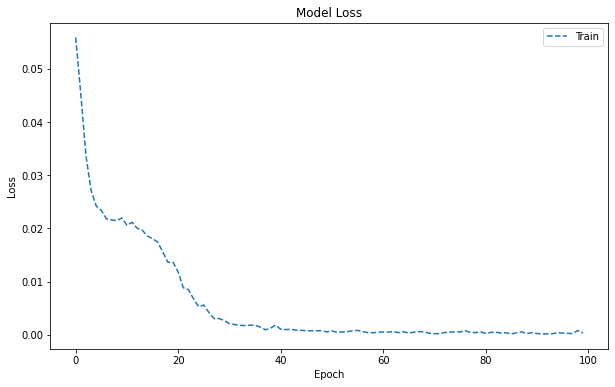

In [174]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'][::10], ls='--')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'])
plt.show()

## Test Model

In [9]:
from utils.anchor_config import AnchorsConfig
from utils.anchors_generator import AnchorsGenerator
from utils.encoder import center_to_corner

In [26]:
def sigmoid(values):
    return 1/(1+np.exp(-values))

In [27]:
def non_max_suppression_fast(boxes, probabilities=None, overlap_threshold=0.3):
    """
    Algorithm to filter bounding box proposals by removing the ones with a too low confidence score
    and with too much overlap.
    Source: https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/
    :param boxes: List of proposed bounding boxes
    :param overlap_threshold: the maximum overlap that is allowed
    :return: filtered boxes
    """
    # if there are no boxes, return an empty list
    if boxes.shape[1] == 0:
        return []
    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    # initialize the list of picked indexes
    pick = []
    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0] - (boxes[:, 2] / [2])  # center x - width/2
    y1 = boxes[:, 1] - (boxes[:, 3] / [2])  # center y - height/2
    x2 = boxes[:, 0] + (boxes[:, 2] / [2])  # center x + width/2
    y2 = boxes[:, 1] + (boxes[:, 3] / [2])  # center y + height/2

    # compute the area of the bounding boxes and grab the indexes to sort
    # (in the case that no probabilities are provided, simply sort on the
    # bottom-left y-coordinate)
    area = boxes[:, 2] * boxes[:, 3]  # width * height
    idxs = y2


    # if probabilities are provided, sort on them instead
    if probabilities is not None:
        idxs = probabilities

    # sort the indexes
    idxs = np.argsort(idxs)
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
                                               np.where(overlap > overlap_threshold)[0])))
    # return only the bounding boxes that were picked
    return pick

In [28]:
def preprocess(bgr_image, w, h, normailze=True):
    # convert to rgb
    rgb_image = bgr_image[:, :, ::-1]
    # pad to square and resize
    shape = np.r_[rgb_image.shape]
    padding = (shape.max() - shape[:2]).astype('uint32') // 2
    rgb_image = np.pad(rgb_image, ((padding[0], padding[0]), (padding[1], padding[1]), (0, 0)), mode='constant')
    rgb_image = cv2.resize(rgb_image, (w, h))
    rgb_image = np.ascontiguousarray(rgb_image)
    # normalize
    if normailze:
        rgb_image = np.ascontiguousarray(2 * ((rgb_image / 255) - 0.5).astype('float32'))
    # reshape as input shape
    rgb_image = rgb_image[tf.newaxis, ...]
    return rgb_image

In [61]:
anchor_config = AnchorsConfig(fixed_anchor_size=False)
anchor_generator = AnchorsGenerator(anchor_config)
anchors = anchor_generator.generate()
anchors_normalized = np.array([[anchor.x_center,anchor.y_center, anchor.w, anchor.h] for anchor in anchors])

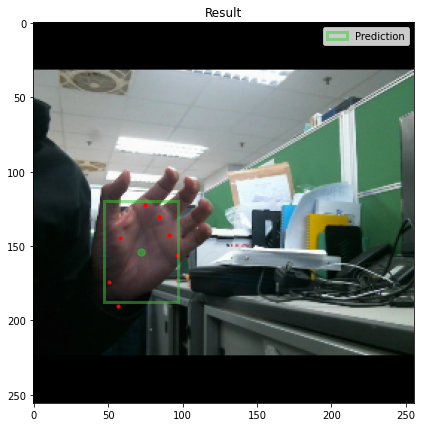

In [181]:
image_path = np.random.choice(glob.glob(os.path.join('dataset','image','*.jpg')))
image = preprocess(cv2.imread(image_path), 256, 256)
pred = model.predict(image)

output_clf = pred[:,:,0][0]
output_reg = pred[:,:,1:][0]
scores = sigmoid(output_clf)
t = 0.95
output_reg = output_reg[scores>t]
output_clf = output_clf[scores>t]
candidate_anchors = anchors_normalized[scores>t]

moved_output_reg = output_reg.copy()
moved_output_reg[:, :2] = moved_output_reg[:, :2] + candidate_anchors[:, :2] * 256

box_ids = non_max_suppression_fast(moved_output_reg[:, :4], output_clf)

center_wo_offst = candidate_anchors[box_ids,:2] * 256
bboxes = moved_output_reg[box_ids, :4].astype('int')
keypoints_set = output_reg[box_ids,4:].reshape(-1, 7, 2)
for i in range(len(keypoints_set)):
    keypoints_set[i] = keypoints_set[i] + center_wo_offst[i]

color = ['limegreen', 'r']
width = [3, 3]
style = ['-', '--']
alpha = [1, 0.5]


plt.figure(figsize=(7, 7))
plt.title("Result")
image_show = preprocess(cv2.imread(image_path), 256, 256, False)
result_image = image_show.copy()[0]
    
for i in range(len(bboxes)):
    cx, cy, w, h = bboxes[i][:4]
    x1, y1, x2, y2 = (cx-w//2, cy-h//2, cx+w//2, cy+h//2)
    if i == 0:
        rect = patches.Rectangle((x1,y1), x2-x1, y2-y1, lw=width[1], ec=color[0], ls=style[0], alpha=alpha[1], facecolor="none", label='Prediction')
    else:
        rect = patches.Rectangle((x1,y1), x2-x1, y2-y1, lw=width[1], ec=color[0], ls=style[0], alpha=alpha[1], facecolor="none")
    plt.gca().add_patch(rect)
    plt.scatter((x2+x1)/2, (y2+y1)/2, color=color[0], s=54.87, alpha=alpha[1])
    for key_point in keypoints_set[i]:
        plt.scatter(key_point[0], key_point[1], color=color[1], s=9.487)

plt.legend()
plt.imshow(result_image)
plt.show()

## Test Model

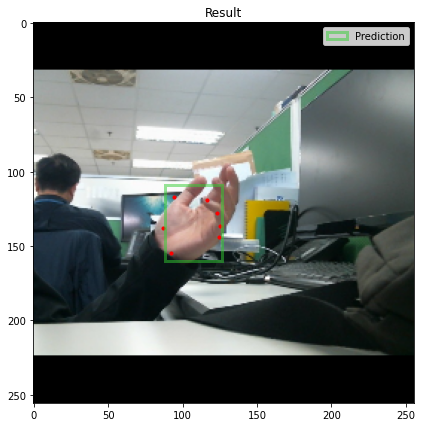

In [184]:
image_path = np.random.choice(glob.glob(os.path.join('dataset','image','*.jpg')))
image = preprocess(cv2.imread(image_path), 256, 256)
image_show = preprocess(cv2.imread(image_path), 256, 256, False)
# plt.imshow(image[0])

pred = model.predict(image)

pred_id = np.argmax(pred[0,:,0])
pred_loc = pred[0,:,1:][pred_id]
pred_loc[:2] = anchors_normalized[pred_id,:2]*256 + pred_loc[:2]
pred_loc[:4] = center_to_corner(np.array([pred_loc[:4]]))
pred_loc[4:] = (pred_loc[4:].reshape(-1, 2) + anchors_normalized[pred_id,:2]*256).reshape(-1)

color = ['limegreen', 'r']
width = [3, 3]
style = ['-', '--']
alpha = [1, 0.5]


plt.figure(figsize=(7, 7))
plt.title("Result")
result_image = image_show.copy()[0]    

x1, y1, x2, y2 = pred_loc[:4]
rect = patches.Rectangle((x1,y1), x2-x1, y2-y1, 
                         lw=width[1], ec=color[0],
                         ls=style[0], alpha=alpha[1], facecolor="none", label='Prediction')
plt.gca().add_patch(rect)
for key_point in pred_loc[4:].reshape(-1, 2):
    plt.scatter(key_point[0], key_point[1], color=color[1], s=9.487)

# plt.scatter((x2+x1)/2, (y2+y1)/2, color=color[0], alpha=alpha[1], s=87)

plt.legend()
plt.imshow(result_image)
plt.show()

## Save Model

In [186]:
model.save('balzepalm_first_version.h5')

In [190]:
palm_model = tf.keras.models.load_model('balzepalm_first_version.h5', custom_objects={'compute_loss': loss_function.SSDLoss(alpha=1./256.).compute_loss})

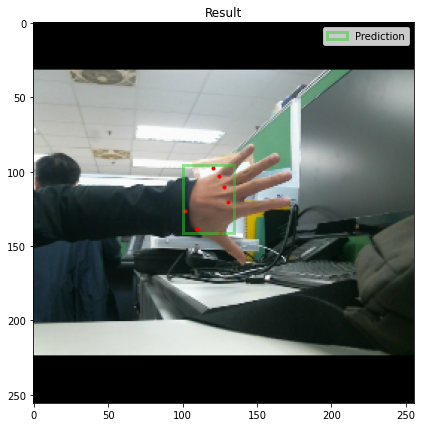

In [193]:
image_path = np.random.choice(glob.glob(os.path.join('dataset','image','*.jpg')))
image = preprocess(cv2.imread(image_path), 256, 256)
image_show = preprocess(cv2.imread(image_path), 256, 256, False)
# plt.imshow(image[0])

pred = palm_model.predict(image)

pred_id = np.argmax(pred[0,:,0])
pred_loc = pred[0,:,1:][pred_id]
pred_loc[:2] = anchors_normalized[pred_id,:2]*256 + pred_loc[:2]
pred_loc[:4] = center_to_corner(np.array([pred_loc[:4]]))
pred_loc[4:] = (pred_loc[4:].reshape(-1, 2) + anchors_normalized[pred_id,:2]*256).reshape(-1)

color = ['limegreen', 'r']
width = [3, 3]
style = ['-', '--']
alpha = [1, 0.5]


plt.figure(figsize=(7, 7))
plt.title("Result")
result_image = image_show.copy()[0]    

x1, y1, x2, y2 = pred_loc[:4]
rect = patches.Rectangle((x1,y1), x2-x1, y2-y1, 
                         lw=width[1], ec=color[0],
                         ls=style[0], alpha=alpha[1], facecolor="none", label='Prediction')
plt.gca().add_patch(rect)
for key_point in pred_loc[4:].reshape(-1, 2):
    plt.scatter(key_point[0], key_point[1], color=color[1], s=9.487)

# plt.scatter((x2+x1)/2, (y2+y1)/2, color=color[0], alpha=alpha[1], s=87)

plt.legend()
plt.imshow(result_image)
plt.show()